# 3. Hallucinations of models

In [14]:
import json
import numpy as np
import pandas as pd
from collections import defaultdict
from common import load_preds, draw_bar_plot

# Amount of undetermined ids per year

In [15]:
models_paths = {
    "Semantic Scholar": "current_methods/search_engines/preds/semantic_scholar",
    "Google Scholar": "current_methods/search_engines/preds/google_scholar",
    "GPT-4o-2024-05-13": "current_methods/instructs_models/preds/gpt-4o-2024-05-13",
    "GPT-4o-2024-05-13 (JM)": "current_methods/instructs_models/preds/gpt-4o-2024-05-13_json",
    "GPT-4o-2024-08-06": "current_methods/instructs_models/preds/gpt-4o-2024-08-06",
    "GPT-4o-2024-08-06 (JM)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_json",
    "GPT-4o-2024-08-06 (SO)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
    "Gemini 1.5 flash": "current_methods/instructs_models/preds/gemini-1.5-flash",
    "Gemini 1.5 flash (JM)": "current_methods/instructs_models/preds/gemini-1.5-flash_json",
    "Gemini 1.5 pro (JM)": "current_methods/instructs_models/preds/gemini-1.5-pro_json",
    "OLMoE-1B-7B-0924-Instruct": "current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct"
}

preds_ids = [load_preds(path) for path in models_paths.values()]

In [27]:
def mean_year(preds:dict, year:int):    
    return np.mean([(len([v for v in vs if v])/len(vs) if len(vs) else 1) for k, vs in preds.items() if str(year) in k])

def mean_match_ids(keys:list, preds:dict, years:list=[2020, 2021, 2022, 2023, 2024]):
    scores = {str(k): {} for k in years}
    for year in years:
            for i, key in enumerate(keys):
                    scores[str(year)][key] = np.mean([mean_year(preds[i][f"A{annotator_i}"], year) for annotator_i in [1,2,3]])
    return scores

def format_to_df(mean_match:dict, keys:list, years:list=[2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    data["year"] = years
    for method in keys:
        for year in years:
            data[method].append(mean_match[str(year)][method])
    return pd.DataFrame(data)

In [28]:
mean_match = mean_match_ids(models_paths.keys(), preds_ids); mean_match

{'2020': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.9380174291938997,
  'GPT-4o-2024-05-13': 0.674506815733686,
  'GPT-4o-2024-05-13 (JM)': 0.44313725490196076,
  'GPT-4o-2024-08-06': 0.588235968622055,
  'GPT-4o-2024-08-06 (JM)': 0.356656346749226,
  'GPT-4o-2024-08-06 (SO)': 0.31764705882352945,
  'Gemini 1.5 flash': 0.27758184368091493,
  'Gemini 1.5 flash (JM)': 0.628024790927723,
  'Gemini 1.5 pro (JM)': 0.5546609028226676,
  'OLMoE-1B-7B-0924-Instruct': 0.1516583413551179},
 '2021': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.975438596491228,
  'GPT-4o-2024-05-13': 0.6133356904804681,
  'GPT-4o-2024-05-13 (JM)': 0.39210526315789473,
  'GPT-4o-2024-08-06': 0.5985297732038811,
  'GPT-4o-2024-08-06 (JM)': 0.37543859649122807,
  'GPT-4o-2024-08-06 (SO)': 0.3315789473684211,
  'Gemini 1.5 flash': 0.31591905460245046,
  'Gemini 1.5 flash (JM)': 0.6648517931473772,
  'Gemini 1.5 pro (JM)': 0.5875514810417858,
  'OLMoE-1B-7B-0924-Instruct': 0.1962411685321902},
 '2022': {'Semant

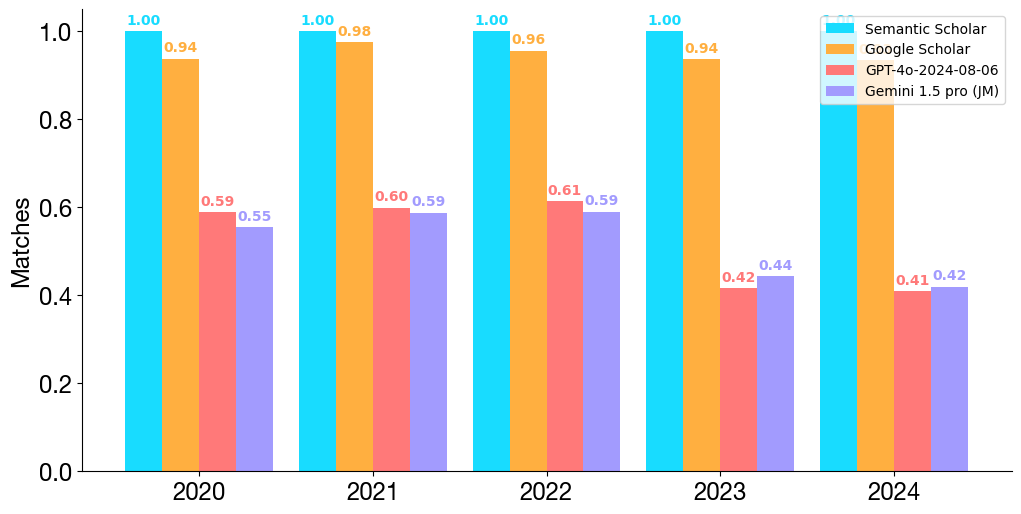

In [29]:
df = format_to_df(mean_match, ["Semantic Scholar", "Google Scholar", "GPT-4o-2024-08-06", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Matches")

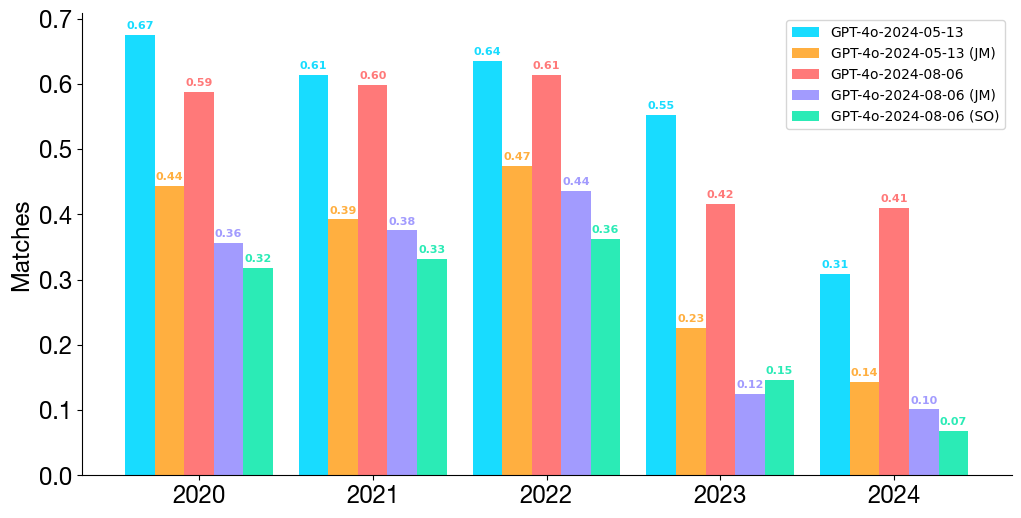

In [30]:
df = format_to_df(mean_match, ["GPT-4o-2024-05-13", "GPT-4o-2024-05-13 (JM)", "GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JM)", "GPT-4o-2024-08-06 (SO)"])
draw_bar_plot(df, ylabel="Matches")

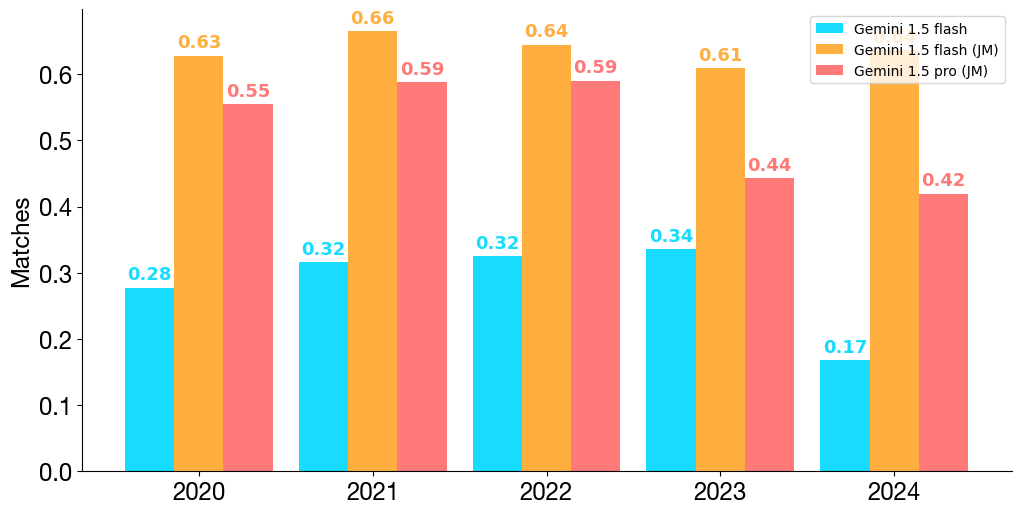

In [31]:
df = format_to_df(mean_match, ["Gemini 1.5 flash", "Gemini 1.5 flash (JM)", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Matches")

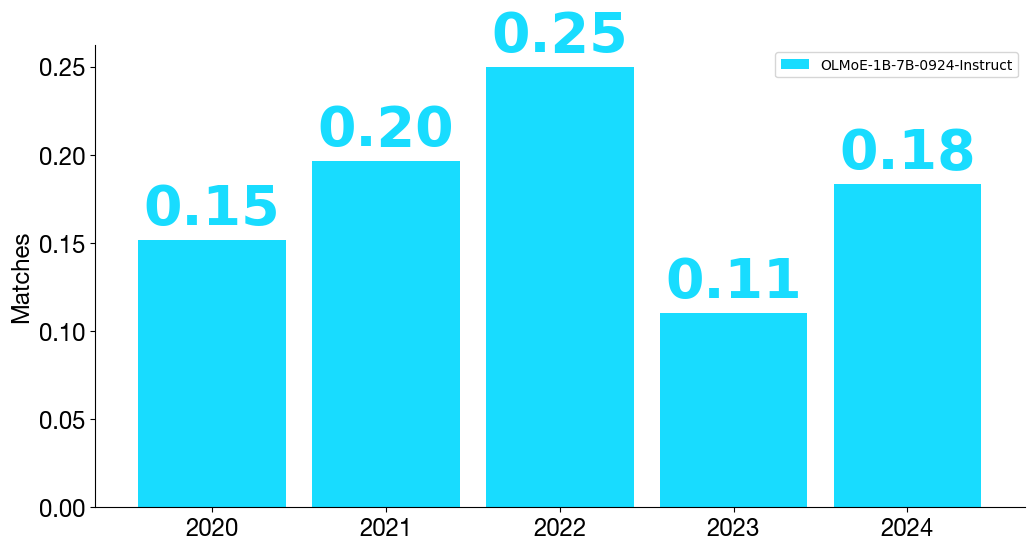

In [32]:
df = format_to_df(mean_match, ["OLMoE-1B-7B-0924-Instruct"])
draw_bar_plot(df, ylabel="Matches")